<a href="https://colab.research.google.com/github/NitinVerma2027/PRML-Apr2025/blob/main/ml_ipynb_files%20/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Logistic Regression for MNIST Digit Classification**  

## **How It Works:**  
Logistic regression is used for classification tasks by predicting probabilities for each class. It learns patterns in the input data and assigns the most likely label to each digit.  
$$$$

For **multi-class classification**, there are two common approaches:  
1. **One-vs-All (OvA)** → Trains separate classifiers for each class.  
2. **Softmax Regression** → Uses a single model to classify all classes at once.  

$$$$
### **Why Softmax?**  
Softmax regression is more efficient because it directly assigns probabilities to multiple classes in a single step, making it better suited for problems like MNIST digit classification.  


#### Keywords for Dimensions:
m => no. of samples

n => no. of features

k => no. of unique classes

# Importing library and files

Downloading...
From (original): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87
From (redirected): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87&confirm=t&uuid=6c165348-f0db-44a0-bf68-20941e0a87cb
To: /content/dataset.csv
100%|██████████| 110M/110M [00:01<00:00, 98.2MB/s] 


   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
no. of data sample : 60000
Training data shape: (48000, 784)
Test data shape: (12000, 784)


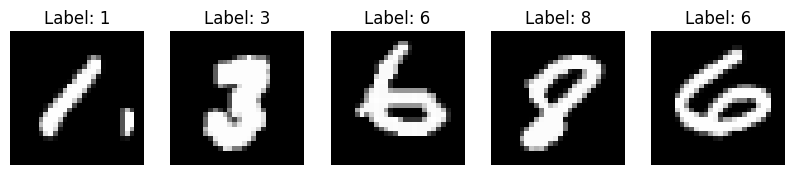

In [ ]:
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split

# file import from derive
file_id = "1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87"
url = f"https://drive.google.com/uc?id={file_id}"

# downloading file
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# dataframe formation
df = pd.read_csv(output, header=None)

print(df.head())

# making y = label(1st column) and x = row (other column).
y = df.iloc[:, 0].values  # Labels
X = df.iloc[:, 1:].values  # Features (pixel values)

# normalize pixel values (0-255 → 0-1)
X = X / 255.0

# dataset size
total_samples = X.shape[0]
print(f"no. of data sample : {total_samples}")

# logic for spliting
train_ratio = 0.8  # train = 80% and test = 20%
train_size = int(total_samples * train_ratio)
test_size = total_samples - train_size

# spliting by sklearn and also i make sure that split is balance by using 'startify = y'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=42
)

# shape of train and test
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# displaying some images.|
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")

plt.show()


## One Hot Encoding


> This function converts class labels into a one-hot encoded matrix. It first creates a matrix of zeros with m rows and num_classes columns, then it places a 1 in the column corresponding to each class label.



In [ ]:
# One-hot encode function dim(m,k)

def one_hot_encode(Y, num_classes):
    m = Y.shape[0]
    one_hot_Y = np.zeros((m, num_classes))
    one_hot_Y[np.arange(m), Y] = 1
    return one_hot_Y

## Adding baise term:


> for example:
dim(X) = (m,n) but dim(X_trian_bais) = (m,n+1)


In [ ]:
# adding bais in matrix
def add_bias_term(X):
    m = X.shape[0]

    # adding column of 1's.
    X_bias = np.c_[np.ones((m, 1)), X]

    return X_bias


## Theta initialization:
 Dim (θ) = (n+1,k)

In [ ]:
# initializing theta with dim => (n+1,k) with random small values

def initialize_weights(n_features, n_classes):
    np.random.seed(42)  # For reproducibility

    Theta = np.random.randn(n_features + 1, n_classes) * 0.01
    return Theta

## **Softmax Function**  
this function is use to classify multiple class at a time .

(i have in place of sigmoid function which is used for binary classification.)

### **Formula:**  
$$
\sigma(Z_i) = \frac{e^{Z_i}}{\sum_{j} e^{Z_j}}
$$  
where:  
- $Z$ is the input (logits).  
- $e^{Z_i}$ represents the exponentiation of each element.  
$$$$
- this is normalize too. and σ(Zi)  is prediction probability.

### For Numerical Stability:
To avoid large exponent values, we subtract the maximum value in $Z$ before putting its value in exponential.  
$$
\text{e}^{zi} = e^{Z - \max(Z)}
$$  



In [ ]:
# softmax function

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

In [ ]:
#inititalizing theta (n+1,k)

def initialize_weights(n_features, n_classes):
    np.random.seed(42) # for same result
    Theta = np.random.randn(n_features + 1, n_classes) * 0.01
    return Theta

## Calculating prediction of training data:
dimension => (m,k)

In [ ]:
def predict_probabilities(X, Theta):

    Z_theta = np.dot(X, Theta)

    P = softmax(Z_theta)  # Shape (m, k)

    return P

## **Cross-Entropy Cost Function**    

#### **Formula:**  
$$
J = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{n} Y_{ij} \log P_{ij}
$$  
where:  
- $m$ is the number of samples.  
- $Y_{ij}$ is the one-hot encoded true label.  
- $P_{ij}$ is the predicted probability for class $j$.  

#### **Numerical Stability:**  
to avoid invalid output problem , range of P = (ϵ,1-ϵ)

In [ ]:
#cost function

def compute_cost(Y, P):
    m = Y.shape[0]
    epsilon = 1e-9

    P = np.clip(P, epsilon, 1 - epsilon)  # restricated range of P

    J = - (1 / m) * np.sum(np.sum(Y * np.log(P), axis=1))

    return J

## **Gradient Computation for Softmax Regression**  

### **Formula:**  
For a dataset with $m$ samples and $n$ features, the gradient is computed as:  
$$
\nabla_{\Theta} J = \frac{1}{m} X^T (P - Y)
$$  
where:  
- $X$ is the input data of shape $(m, n)$.  
- $Y$ is the one-hot encoded true labels of shape $(m, k)$.  
- $P$ is the predicted probability matrix of shape $(m, k)$.  
- $\Theta$ represents the model parameters (weights).  

In [ ]:
#compute gradient

def compute_gradient(X, Y, P):
    m = X.shape[0]  # Number of samples

    dTheta = (1 / m) * np.dot(X.T, (P - Y))  # Shape (n+1, k)

    return dTheta


## **Gradient Descent for Softmax Regression**  

#### **Update Rule:**  
Gradient descent updates the parameters **Θ** using the following formula:  
$$
\Theta := \Theta - \alpha \nabla_{\Theta} J
$$  
where:  
- $\alpha$ is the **learning rate**.  
- $\nabla_{\Theta} J$ is the **gradient of the cost function**.  
- $\Theta$ represents the model parameters (weights).   


In [ ]:
from tqdm import tqdm

def gradient_descent(X, Y, theta, alpha, epochs):
    cost_history = []
    m = X.shape[0]

    for i in tqdm(range(epochs), desc="training Progress", ncols=100, unit="epoch"):
        P = predict_probabilities(X, theta)  # Compute predictions
        cost = compute_cost(Y, P)  # Compute cost
        cost_history.append(cost)

        dTheta = compute_gradient(X, Y, P)  # Compute gradient

        theta -= alpha * dTheta  # Update weights

        if i % 10 == 0:
            gradient_norm = np.linalg.norm(dTheta)
            print(f"Cost = {cost:.4f}, Gradient Norm = {gradient_norm:.4f}")

    return theta, cost_history


training Progress:   0%|                                        | 1/1000 [00:00<04:04,  4.08epoch/s]

Cost = 2.3239, Gradient Norm = 1.0463


training Progress:   1%|▍                                      | 11/1000 [00:03<07:02,  2.34epoch/s]

Cost = 1.5593, Gradient Norm = 0.7080


training Progress:   2%|▊                                      | 21/1000 [00:07<04:40,  3.49epoch/s]

Cost = 1.1941, Gradient Norm = 0.5027


training Progress:   3%|█▏                                     | 31/1000 [00:09<04:16,  3.78epoch/s]

Cost = 0.9988, Gradient Norm = 0.3827


training Progress:   4%|█▌                                     | 41/1000 [00:12<04:03,  3.94epoch/s]

Cost = 0.8795, Gradient Norm = 0.3083


training Progress:   5%|█▉                                     | 51/1000 [00:14<04:03,  3.89epoch/s]

Cost = 0.7991, Gradient Norm = 0.2585


training Progress:   6%|██▍                                    | 61/1000 [00:18<06:41,  2.34epoch/s]

Cost = 0.7410, Gradient Norm = 0.2232


training Progress:   7%|██▊                                    | 71/1000 [00:21<04:31,  3.42epoch/s]

Cost = 0.6969, Gradient Norm = 0.1968


training Progress:   8%|███▏                                   | 81/1000 [00:24<04:24,  3.47epoch/s]

Cost = 0.6620, Gradient Norm = 0.1763


training Progress:   9%|███▌                                   | 91/1000 [00:27<04:31,  3.35epoch/s]

Cost = 0.6337, Gradient Norm = 0.1600


training Progress:  10%|███▊                                  | 101/1000 [00:31<06:38,  2.26epoch/s]

Cost = 0.6101, Gradient Norm = 0.1466


training Progress:  11%|████▏                                 | 111/1000 [00:35<04:08,  3.57epoch/s]

Cost = 0.5902, Gradient Norm = 0.1355


training Progress:  12%|████▌                                 | 121/1000 [00:37<03:53,  3.76epoch/s]

Cost = 0.5730, Gradient Norm = 0.1261


training Progress:  13%|████▉                                 | 131/1000 [00:40<03:57,  3.66epoch/s]

Cost = 0.5581, Gradient Norm = 0.1180


training Progress:  14%|█████▎                                | 141/1000 [00:43<03:47,  3.78epoch/s]

Cost = 0.5450, Gradient Norm = 0.1110


training Progress:  15%|█████▋                                | 151/1000 [00:47<06:41,  2.11epoch/s]

Cost = 0.5333, Gradient Norm = 0.1049


training Progress:  16%|██████                                | 161/1000 [00:50<03:49,  3.65epoch/s]

Cost = 0.5228, Gradient Norm = 0.0995


training Progress:  17%|██████▍                               | 171/1000 [00:53<03:41,  3.74epoch/s]

Cost = 0.5134, Gradient Norm = 0.0946


training Progress:  18%|██████▉                               | 181/1000 [00:55<03:52,  3.52epoch/s]

Cost = 0.5048, Gradient Norm = 0.0903


training Progress:  19%|███████▎                              | 191/1000 [00:58<04:55,  2.74epoch/s]

Cost = 0.4970, Gradient Norm = 0.0864


training Progress:  20%|███████▋                              | 201/1000 [01:02<04:18,  3.09epoch/s]

Cost = 0.4898, Gradient Norm = 0.0829


training Progress:  21%|████████                              | 211/1000 [01:05<03:27,  3.81epoch/s]

Cost = 0.4832, Gradient Norm = 0.0797


training Progress:  22%|████████▍                             | 221/1000 [01:07<03:14,  4.01epoch/s]

Cost = 0.4771, Gradient Norm = 0.0767


training Progress:  23%|████████▊                             | 231/1000 [01:10<03:17,  3.89epoch/s]

Cost = 0.4714, Gradient Norm = 0.0740


training Progress:  24%|█████████▏                            | 241/1000 [01:13<05:13,  2.42epoch/s]

Cost = 0.4661, Gradient Norm = 0.0715


training Progress:  25%|█████████▌                            | 251/1000 [01:17<03:30,  3.56epoch/s]

Cost = 0.4611, Gradient Norm = 0.0692


training Progress:  26%|█████████▉                            | 261/1000 [01:19<03:06,  3.96epoch/s]

Cost = 0.4565, Gradient Norm = 0.0670


training Progress:  27%|██████████▎                           | 271/1000 [01:22<03:02,  4.00epoch/s]

Cost = 0.4521, Gradient Norm = 0.0650


training Progress:  28%|██████████▋                           | 281/1000 [01:24<03:02,  3.93epoch/s]

Cost = 0.4480, Gradient Norm = 0.0632


training Progress:  29%|███████████                           | 291/1000 [01:28<04:50,  2.44epoch/s]

Cost = 0.4441, Gradient Norm = 0.0614


training Progress:  30%|███████████▍                          | 301/1000 [01:31<03:19,  3.50epoch/s]

Cost = 0.4405, Gradient Norm = 0.0598


training Progress:  31%|███████████▊                          | 311/1000 [01:34<03:32,  3.25epoch/s]

Cost = 0.4370, Gradient Norm = 0.0582


training Progress:  32%|████████████▏                         | 321/1000 [01:37<02:58,  3.80epoch/s]

Cost = 0.4337, Gradient Norm = 0.0568


training Progress:  33%|████████████▌                         | 331/1000 [01:40<04:27,  2.51epoch/s]

Cost = 0.4305, Gradient Norm = 0.0554


training Progress:  34%|████████████▉                         | 341/1000 [01:44<03:29,  3.14epoch/s]

Cost = 0.4275, Gradient Norm = 0.0541


training Progress:  35%|█████████████▎                        | 351/1000 [01:46<02:48,  3.85epoch/s]

Cost = 0.4247, Gradient Norm = 0.0529


training Progress:  36%|█████████████▋                        | 361/1000 [01:49<02:52,  3.69epoch/s]

Cost = 0.4219, Gradient Norm = 0.0517


training Progress:  37%|██████████████                        | 371/1000 [01:52<02:37,  4.00epoch/s]

Cost = 0.4193, Gradient Norm = 0.0506


training Progress:  38%|██████████████▍                       | 381/1000 [01:55<04:19,  2.39epoch/s]

Cost = 0.4168, Gradient Norm = 0.0496


training Progress:  39%|██████████████▊                       | 391/1000 [01:58<02:40,  3.78epoch/s]

Cost = 0.4144, Gradient Norm = 0.0486


training Progress:  40%|███████████████▏                      | 401/1000 [02:01<02:33,  3.91epoch/s]

Cost = 0.4121, Gradient Norm = 0.0476


training Progress:  41%|███████████████▌                      | 411/1000 [02:04<02:46,  3.55epoch/s]

Cost = 0.4098, Gradient Norm = 0.0467


training Progress:  42%|███████████████▉                      | 421/1000 [02:06<02:49,  3.42epoch/s]

Cost = 0.4077, Gradient Norm = 0.0458


training Progress:  43%|████████████████▍                     | 431/1000 [02:10<03:09,  3.00epoch/s]

Cost = 0.4056, Gradient Norm = 0.0450


training Progress:  44%|████████████████▊                     | 441/1000 [02:13<02:24,  3.87epoch/s]

Cost = 0.4037, Gradient Norm = 0.0442


training Progress:  45%|█████████████████▏                    | 451/1000 [02:16<02:20,  3.92epoch/s]

Cost = 0.4017, Gradient Norm = 0.0434


training Progress:  46%|█████████████████▌                    | 461/1000 [02:18<02:15,  3.98epoch/s]

Cost = 0.3999, Gradient Norm = 0.0427


training Progress:  47%|█████████████████▉                    | 471/1000 [02:22<03:34,  2.47epoch/s]

Cost = 0.3981, Gradient Norm = 0.0420


training Progress:  48%|██████████████████▎                   | 481/1000 [02:25<02:23,  3.61epoch/s]

Cost = 0.3963, Gradient Norm = 0.0413


training Progress:  49%|██████████████████▋                   | 491/1000 [02:27<02:07,  3.99epoch/s]

Cost = 0.3947, Gradient Norm = 0.0406


training Progress:  50%|███████████████████                   | 501/1000 [02:30<02:11,  3.79epoch/s]

Cost = 0.3930, Gradient Norm = 0.0400


training Progress:  51%|███████████████████▍                  | 511/1000 [02:33<02:10,  3.76epoch/s]

Cost = 0.3915, Gradient Norm = 0.0394


training Progress:  52%|███████████████████▊                  | 521/1000 [02:37<03:28,  2.30epoch/s]

Cost = 0.3899, Gradient Norm = 0.0388


training Progress:  53%|████████████████████▏                 | 531/1000 [02:39<02:21,  3.31epoch/s]

Cost = 0.3884, Gradient Norm = 0.0383


training Progress:  54%|████████████████████▌                 | 541/1000 [02:42<02:06,  3.62epoch/s]

Cost = 0.3870, Gradient Norm = 0.0377


training Progress:  55%|████████████████████▉                 | 551/1000 [02:45<01:56,  3.86epoch/s]

Cost = 0.3856, Gradient Norm = 0.0372


training Progress:  56%|█████████████████████▎                | 561/1000 [02:48<02:46,  2.63epoch/s]

Cost = 0.3842, Gradient Norm = 0.0367


training Progress:  57%|█████████████████████▋                | 571/1000 [02:52<02:03,  3.48epoch/s]

Cost = 0.3829, Gradient Norm = 0.0362


training Progress:  58%|██████████████████████                | 581/1000 [02:54<01:47,  3.88epoch/s]

Cost = 0.3816, Gradient Norm = 0.0357


training Progress:  59%|██████████████████████▍               | 591/1000 [02:57<01:45,  3.89epoch/s]

Cost = 0.3803, Gradient Norm = 0.0352


training Progress:  60%|██████████████████████▊               | 601/1000 [02:59<01:43,  3.85epoch/s]

Cost = 0.3791, Gradient Norm = 0.0348


training Progress:  61%|███████████████████████▏              | 611/1000 [03:03<03:02,  2.13epoch/s]

Cost = 0.3779, Gradient Norm = 0.0344


training Progress:  62%|███████████████████████▌              | 621/1000 [03:07<01:58,  3.20epoch/s]

Cost = 0.3768, Gradient Norm = 0.0339


training Progress:  63%|███████████████████████▉              | 631/1000 [03:10<01:49,  3.37epoch/s]

Cost = 0.3756, Gradient Norm = 0.0335


training Progress:  64%|████████████████████████▎             | 641/1000 [03:13<01:43,  3.48epoch/s]

Cost = 0.3745, Gradient Norm = 0.0331


training Progress:  65%|████████████████████████▋             | 651/1000 [03:17<02:40,  2.17epoch/s]

Cost = 0.3734, Gradient Norm = 0.0327


training Progress:  66%|█████████████████████████             | 661/1000 [03:20<01:36,  3.51epoch/s]

Cost = 0.3724, Gradient Norm = 0.0324


training Progress:  67%|█████████████████████████▍            | 671/1000 [03:23<01:27,  3.77epoch/s]

Cost = 0.3713, Gradient Norm = 0.0320


training Progress:  68%|█████████████████████████▉            | 681/1000 [03:26<01:29,  3.58epoch/s]

Cost = 0.3703, Gradient Norm = 0.0316


training Progress:  69%|██████████████████████████▎           | 691/1000 [03:29<01:44,  2.96epoch/s]

Cost = 0.3693, Gradient Norm = 0.0313


training Progress:  70%|██████████████████████████▋           | 701/1000 [03:33<01:53,  2.64epoch/s]

Cost = 0.3684, Gradient Norm = 0.0309


training Progress:  71%|███████████████████████████           | 711/1000 [03:36<01:17,  3.72epoch/s]

Cost = 0.3674, Gradient Norm = 0.0306


training Progress:  72%|███████████████████████████▍          | 721/1000 [03:38<01:15,  3.71epoch/s]

Cost = 0.3665, Gradient Norm = 0.0303


training Progress:  73%|███████████████████████████▊          | 731/1000 [03:41<01:18,  3.41epoch/s]

Cost = 0.3656, Gradient Norm = 0.0300


training Progress:  74%|████████████████████████████▏         | 741/1000 [03:45<01:48,  2.38epoch/s]

Cost = 0.3647, Gradient Norm = 0.0297


training Progress:  75%|████████████████████████████▌         | 751/1000 [03:48<01:13,  3.39epoch/s]

Cost = 0.3638, Gradient Norm = 0.0294


training Progress:  76%|████████████████████████████▉         | 761/1000 [03:51<01:00,  3.96epoch/s]

Cost = 0.3630, Gradient Norm = 0.0291


training Progress:  77%|█████████████████████████████▎        | 771/1000 [03:53<00:59,  3.83epoch/s]

Cost = 0.3621, Gradient Norm = 0.0288


training Progress:  78%|█████████████████████████████▋        | 781/1000 [03:56<00:58,  3.72epoch/s]

Cost = 0.3613, Gradient Norm = 0.0285


training Progress:  79%|██████████████████████████████        | 791/1000 [04:00<01:28,  2.37epoch/s]

Cost = 0.3605, Gradient Norm = 0.0283


training Progress:  80%|██████████████████████████████▍       | 801/1000 [04:03<00:55,  3.59epoch/s]

Cost = 0.3597, Gradient Norm = 0.0280


training Progress:  81%|██████████████████████████████▊       | 811/1000 [04:06<00:48,  3.91epoch/s]

Cost = 0.3589, Gradient Norm = 0.0277


training Progress:  82%|███████████████████████████████▏      | 821/1000 [04:08<00:45,  3.93epoch/s]

Cost = 0.3582, Gradient Norm = 0.0275


training Progress:  83%|███████████████████████████████▌      | 831/1000 [04:11<01:05,  2.58epoch/s]

Cost = 0.3574, Gradient Norm = 0.0272


training Progress:  84%|███████████████████████████████▉      | 841/1000 [04:15<00:46,  3.41epoch/s]

Cost = 0.3567, Gradient Norm = 0.0270


training Progress:  85%|████████████████████████████████▎     | 851/1000 [04:18<00:37,  3.95epoch/s]

Cost = 0.3560, Gradient Norm = 0.0267


training Progress:  86%|████████████████████████████████▋     | 861/1000 [04:20<00:37,  3.74epoch/s]

Cost = 0.3552, Gradient Norm = 0.0265


training Progress:  87%|█████████████████████████████████     | 871/1000 [04:23<00:33,  3.80epoch/s]

Cost = 0.3545, Gradient Norm = 0.0263


training Progress:  88%|█████████████████████████████████▍    | 881/1000 [04:27<00:53,  2.23epoch/s]

Cost = 0.3539, Gradient Norm = 0.0261


training Progress:  89%|█████████████████████████████████▊    | 891/1000 [04:30<00:29,  3.70epoch/s]

Cost = 0.3532, Gradient Norm = 0.0258


training Progress:  90%|██████████████████████████████████▏   | 901/1000 [04:33<00:34,  2.85epoch/s]

Cost = 0.3525, Gradient Norm = 0.0256


training Progress:  91%|██████████████████████████████████▌   | 911/1000 [04:36<00:23,  3.77epoch/s]

Cost = 0.3519, Gradient Norm = 0.0254


training Progress:  92%|██████████████████████████████████▉   | 921/1000 [04:39<00:31,  2.50epoch/s]

Cost = 0.3512, Gradient Norm = 0.0252


training Progress:  93%|███████████████████████████████████▍  | 931/1000 [04:43<00:20,  3.39epoch/s]

Cost = 0.3506, Gradient Norm = 0.0250


training Progress:  94%|███████████████████████████████████▊  | 941/1000 [04:46<00:16,  3.58epoch/s]

Cost = 0.3500, Gradient Norm = 0.0248


training Progress:  95%|████████████████████████████████████▏ | 951/1000 [04:48<00:12,  3.89epoch/s]

Cost = 0.3494, Gradient Norm = 0.0246


training Progress:  96%|████████████████████████████████████▌ | 961/1000 [04:51<00:09,  3.93epoch/s]

Cost = 0.3488, Gradient Norm = 0.0244


training Progress:  97%|████████████████████████████████████▉ | 971/1000 [04:55<00:12,  2.25epoch/s]

Cost = 0.3482, Gradient Norm = 0.0242


training Progress:  98%|█████████████████████████████████████▎| 981/1000 [04:58<00:05,  3.72epoch/s]

Cost = 0.3476, Gradient Norm = 0.0241


training Progress:  99%|█████████████████████████████████████▋| 991/1000 [05:01<00:02,  3.83epoch/s]

Cost = 0.3470, Gradient Norm = 0.0239


training Progress: 100%|█████████████████████████████████████| 1000/1000 [05:03<00:00,  3.30epoch/s]


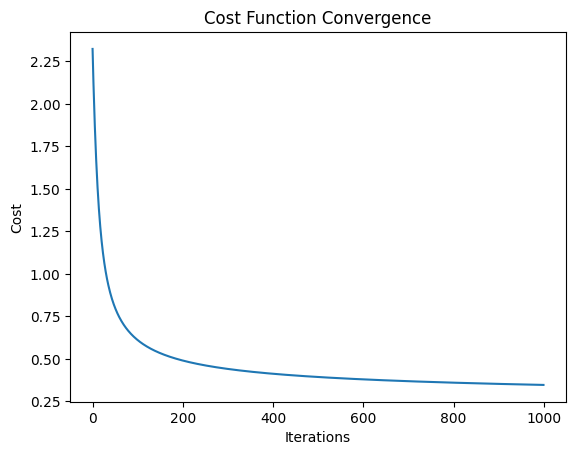

In [ ]:
alpha = 0.1  # learning rate
epochs = 1000  # number of iterations

num_classes = 10
n_features = X_train.shape[1]

# initialize weights
theta = initialize_weights(n_features, num_classes)

#baising added
X_train_bias = add_bias_term(X_train)

# One-hot encode Y_train
Y_train_one_hot = one_hot_encode(y_train, num_classes)

# model training
Theta_opt, cost_history = gradient_descent(X_train_bias, Y_train_one_hot, theta, alpha, epochs)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


# Evaluation part

## prediciton on test dataset

In [ ]:
def predict(X, Theta):
    P = predict_probabilities(X, Theta)
    predictions = np.argmax(P, axis=1)
    return predictions, P

#--------------------------------------------------------
X_test_bias = add_bias_term(X_test)
y_pred, P_test = predict(X_test_bias, Theta_opt)

## Confusion matrix

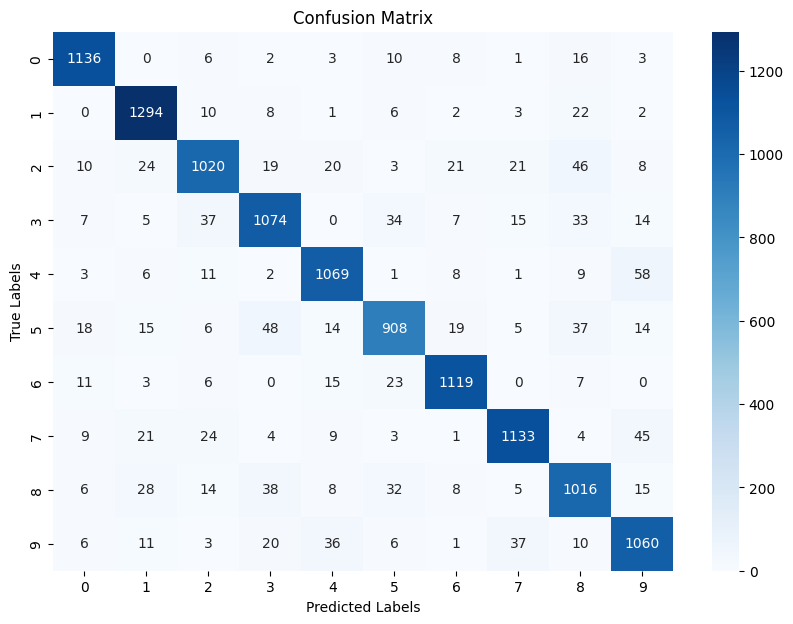

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## precision, recall, f1_score, support

In [ ]:

num_classes = conf_matrix.shape[0]

# initializing precision, recall, f1_score
precision = np.zeros(num_classes)
recall = np.zeros(num_classes)
f1_score = np.zeros(num_classes)

# Calculting matrix of above things
for i in range(num_classes):
    TP = conf_matrix[i, i]  # True Positives
    FP = np.sum(conf_matrix[:, i]) - TP  # False Positives
    FN = np.sum(conf_matrix[i, :]) - TP  # False Negatives

    precision[i] = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall[i] = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0.0

# Printing
print("\nClassification matrics :")
for i in range(num_classes):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-score={f1_score[i]:.4f}")



Classification matrics :
Class 0: Precision=0.9420, Recall=0.9586, F1-score=0.9502
Class 1: Precision=0.9197, Recall=0.9599, F1-score=0.9394
Class 2: Precision=0.8971, Recall=0.8557, F1-score=0.8759
Class 3: Precision=0.8840, Recall=0.8760, F1-score=0.8800
Class 4: Precision=0.9098, Recall=0.9152, F1-score=0.9125
Class 5: Precision=0.8850, Recall=0.8376, F1-score=0.8607
Class 6: Precision=0.9372, Recall=0.9451, F1-score=0.9411
Class 7: Precision=0.9279, Recall=0.9042, F1-score=0.9159
Class 8: Precision=0.8467, Recall=0.8684, F1-score=0.8574
Class 9: Precision=0.8696, Recall=0.8908, F1-score=0.8800


## Overall Accuracy

In [ ]:
# overall accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.9024


## ROC curve

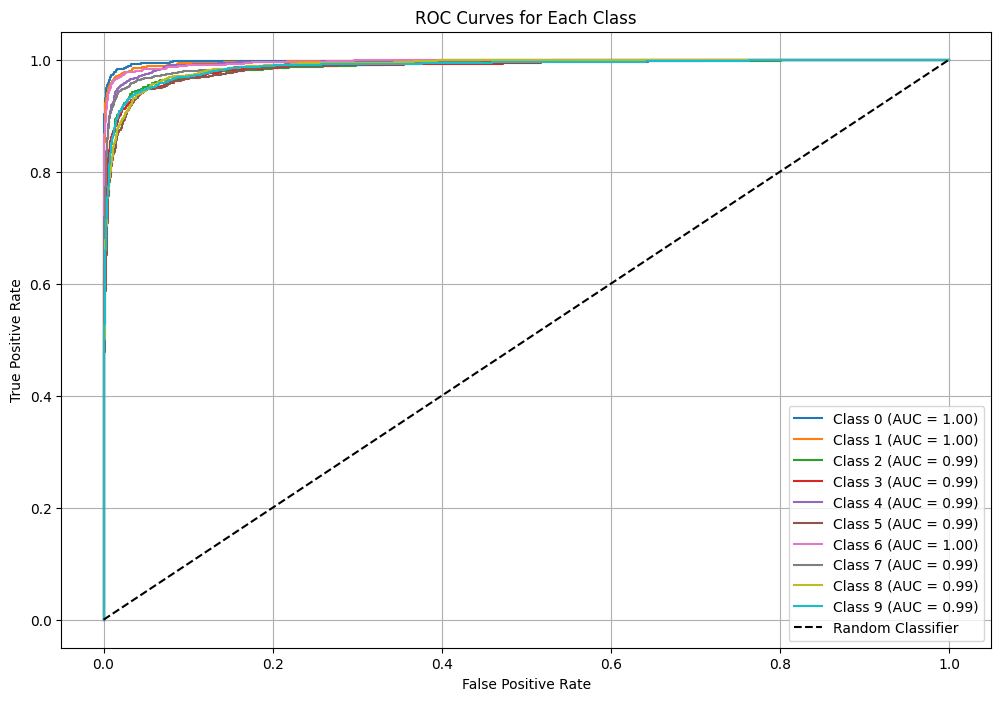

In [ ]:

plt.figure(figsize=(12, 8))
for i in range(10):  # 10 classes
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), P_test[:, i])  # One-vs-all ROC curve
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend()
plt.grid()
plt.show()


## Accuracy per class

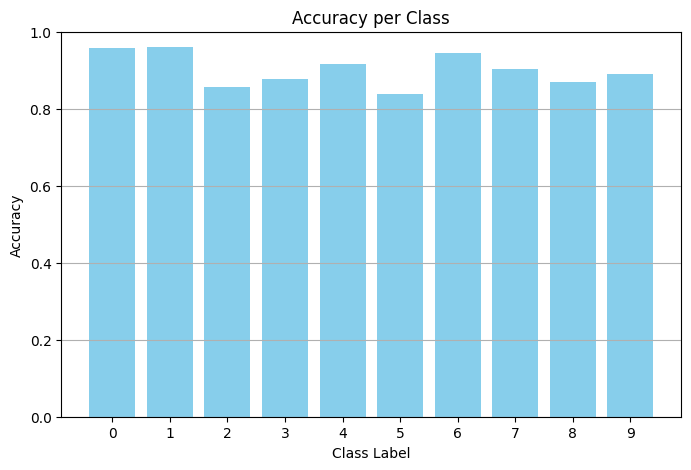

In [ ]:

class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
plt.figure(figsize=(8, 5))
plt.bar(range(10), class_accuracy, color="skyblue")
plt.xlabel("Class Label")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Accuracy per Class")
plt.xticks(range(10))
plt.grid(axis="y")
plt.show()

## Some Predicition example

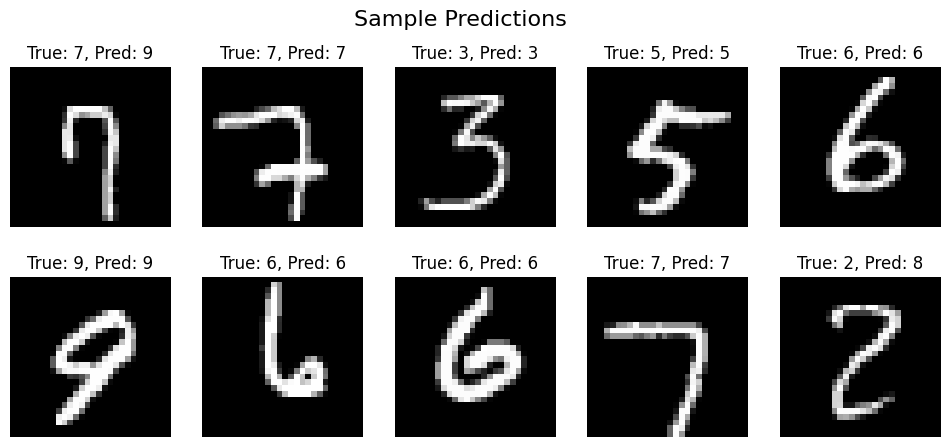

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Predictions", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis("off")

plt.show()